# OSM API Python

Trying out this example (https://pygis.io/docs/d_access_osm.html) to get querying OSM given a polygon.

In [63]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np

place_name = "Edgewood Washington, DC, USA"

# get place boundary related to the place name as a gdf
area = ox.geocode_to_gdf(place_name)
print(area.geometry)

0    POLYGON ((-77.00892 38.92123, -77.00890 38.920...
Name: geometry, dtype: geometry


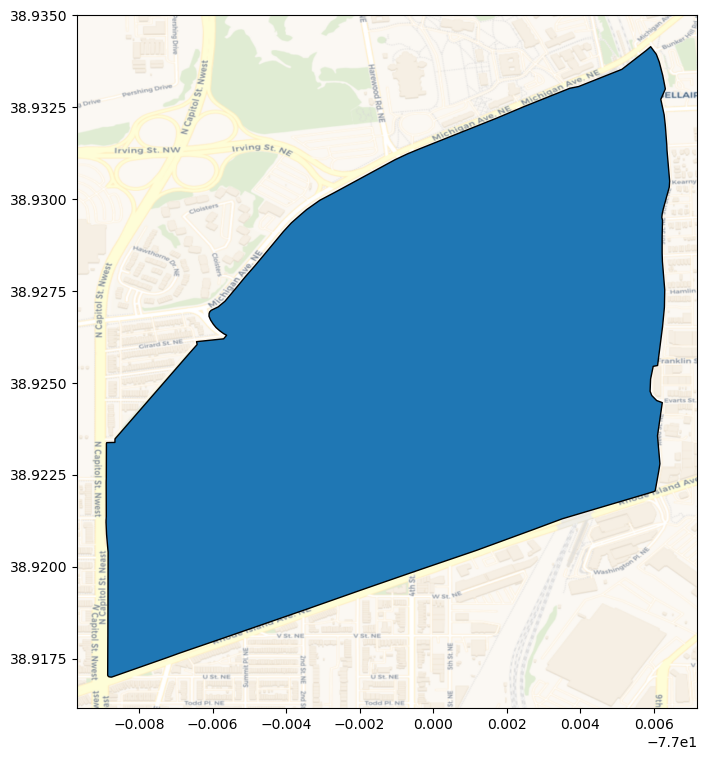

In [25]:
fig, ax = plt.subplots(1,1,figsize=(8,10))


area.plot(ax=ax, edgecolor='black')
cx.add_basemap(ax, crs='EPSG:4326', attribution=False, source=cx.providers.CartoDB.Voyager)

plt.show()

<Axes: >

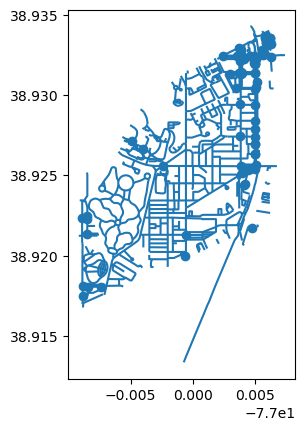

In [36]:
tags = {'highway': True}

roads = ox.features_from_place(place_name, tags)
roads.head()
roads.plot()

In [89]:
poly = gpd.read_file("polygons/whitworth.geojson")

print(poly.crs)
north = poly.total_bounds[3]
south = poly.total_bounds[1]
east = poly.total_bounds[2]
west = poly.total_bounds[0]

tags = {"highway" : True, "railway" : True, "waterway" : True}
ways = ox.features_from_bbox(north, south, east, west, tags)
ways = ways.loc[ways.geometry.type=='LineString']
ways = ways.loc[ways.highway!="footway"]


EPSG:4326


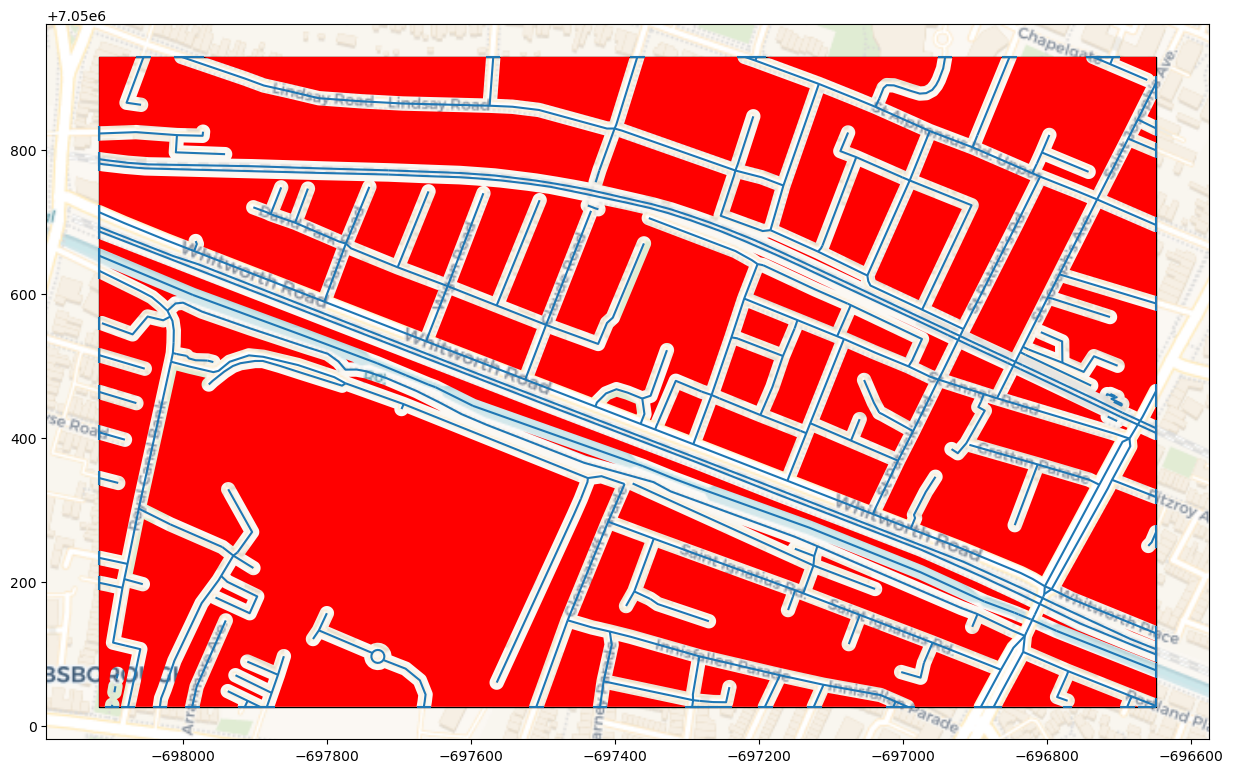

In [105]:
poly = poly.to_crs(3857)
ways = ways.to_crs(3857)

ways_clip = gpd.clip(ways, poly)

ways_buffer = gpd.GeoDataFrame(geometry=ways_clip.buffer(10))

ways_poly = poly.overlay(ways_buffer, how='symmetric_difference')
ways_poly = gpd.clip(ways_poly, poly)
#ways_poly = poly.symmetric_difference(ways_buffer)

fig, ax = plt.subplots(1,1,figsize=(15,10))

poly.plot(ax=ax, edgecolor='black', facecolor='none')
cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

#ways_buffer.plot(ax=ax, facecolor='pink')
ways_clip.plot(ax=ax)
ways_poly.plot(ax=ax, facecolor='red')
plt.show()